In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data_path= r'E:\Weather Predict\testset.csv'
df=pd.read_csv(data_path)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


Remove extra space

In [7]:
df.columns= df.columns.str.lstrip()
df.columns= df.columns.str.rstrip()
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


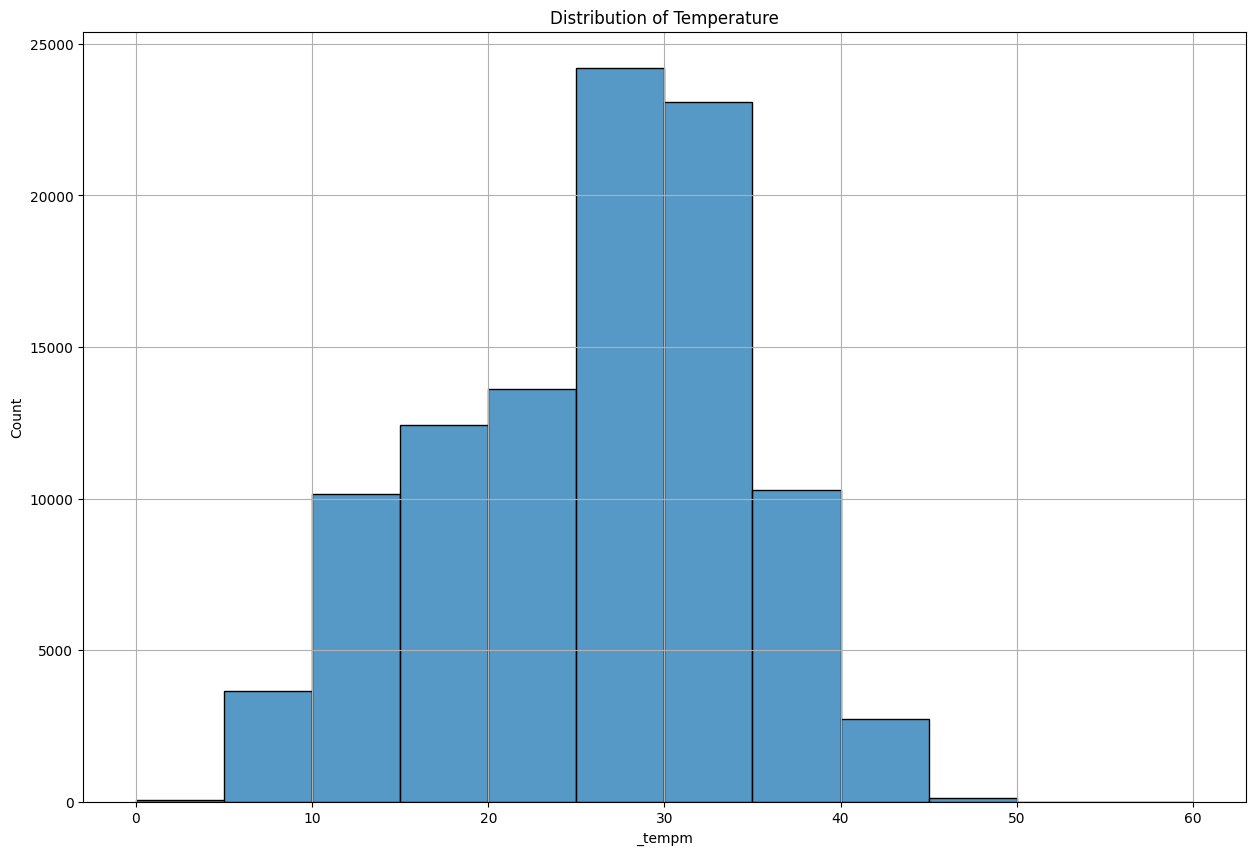

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(df._tempm,bins=[i for i in range(0,61,5)],kde=False)
plt.title("Distribution of Temperature")
plt.grid()
plt.show()

In [20]:
df.index=pd.to_datetime(df.datetime_utc	)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [22]:
required_cols= ["_dewptm","_fog","_hail","_rain","_snow","_tempm","_thunder","_tornado"]
df=df[required_cols]
df.head()

,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,0,0,23.0,0,0


In [23]:
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [24]:
df= df.fillna(method="ffill")
df.head()

C:\Users\prith\AppData\Local\Temp\ipykernel_11592\2436218834.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method="ffill")


,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,0,0,23.0,0,0


In [25]:
df.isna().sum()

_dewptm     0
_fog        0
_hail       0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

Resample by Day.

df_final= df.resample("D").mean()

if want to resample by Month write "M", for Hour "H", For week "W"

In [26]:
df_final= df.resample("D").mean()
df_final.head()

,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01,11.666667,0.0,0.0,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,0.0,0.0,27.800000,0.0,0.0


In [27]:
df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [29]:
df_final=df_final.fillna(method="ffill")
df_final.head()

C:\Users\prith\AppData\Local\Temp\ipykernel_11592\3536653163.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final=df_final.fillna(method="ffill")


,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01,11.666667,0.0,0.0,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,0.0,0.0,27.800000,0.0,0.0


In [30]:
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

LSTM MODEL CODE HERE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df_final = df_final.fillna(0)  


scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_final)


sequence_length = 10
num_features = len(df_final.columns)


sequences = []
labels = []

for i in range(len(scaler_data) - sequence_length):
    seq = scaler_data[i:i + sequence_length]
    label = scaler_data[i + sequence_length, 6]  
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)


train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape", train_x.shape)
print("Test X shape", test_x.shape)
print("Train Y shape", train_y.shape)
print("Test Y shape", test_y.shape)


Train X shape (5976, 10, 8)
Test X shape (1494, 10, 8)
Train Y shape (5976,)
Test Y shape (1494,)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Use Input layer explicitly for the first layer
model.add(Input(shape=(train_x.shape[1], train_x.shape[2])))

# Add LSTM layers with dropout
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 10, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,001 (515.63 KB)

 Trainable params: 132,001 (515.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - val_loss: 0.0030


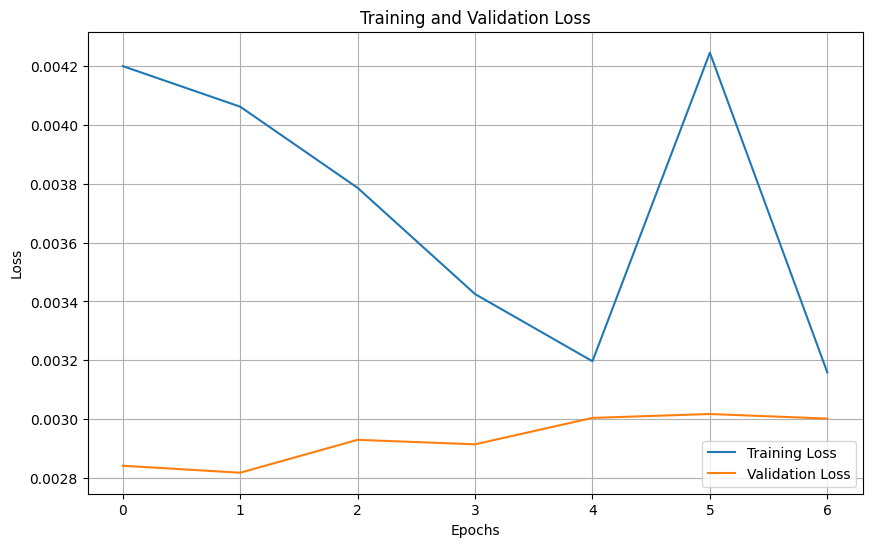

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use the '.keras' extension for saving the model weights
model_checkpoint = ModelCheckpoint(r'E:\Weather Predict\best_model_weights.keras', 
                                   monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint],
    verbose=1  # Show progress during training
)

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import tensorflow as tf
best_model= tf.keras.models.load_model(r"E:\Weather Predict\best_model_weights.keras")
test_loss=best_model.evaluate(test_x,test_y)
print("Test Loss",test_loss)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 
Test Loss 0.0017560463165864348


In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

predictions=best_model.predict(test_x)

mae=mean_absolute_error(test_y,predictions)
mse=mean_squared_error(test_y,predictions)
rmse=np.sqrt(mse)

print("Mean Absolute Error  ", mae)
print("Mean Sequared Error  ", mse)
print("Root Mean Squared Error  ", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Absolute Error   0.016506254769176176
Mean Sequared Error   0.0017560463675747409
Root Mean Squared Error   0.04190520692676199


In [50]:
# Ensure the feature count matches the scaler's expectations
feature_count = scaler.min_.shape[0]  # Get the feature count from the scaler

# True values
test_y_copies = np.repeat(test_y.reshape(-1, 1), feature_count, axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:, 6]  # Adjust index if needed

# Predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, feature_count, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:, 6]  # Adjust index if needed


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


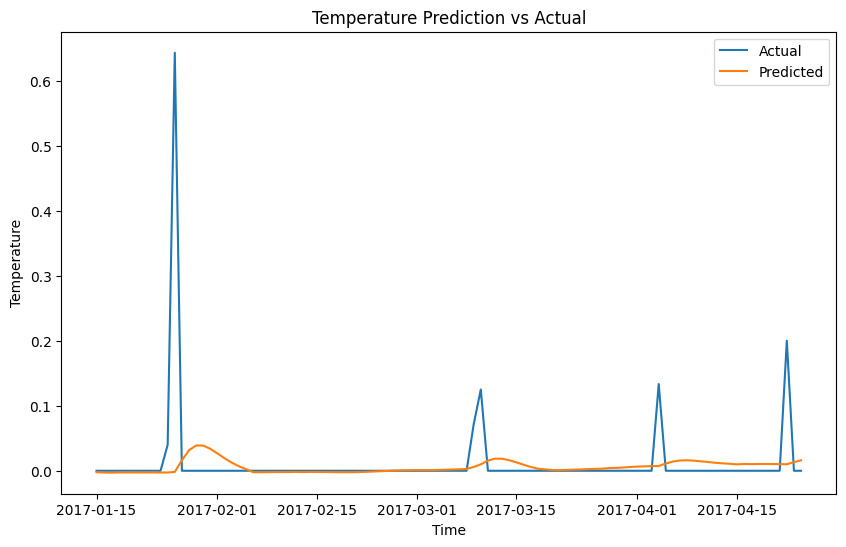

In [55]:

# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
     

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Sample Predicted Temperatures: [0.00643181 0.00723772 0.0071919  0.0064502  0.00621882 0.00575073
 0.00523662 0.00492533 0.00257099 0.00232939]
Sample True Temperatures: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Absolute Error (MAE): 0.016506254769176176
Mean Squared Error (MSE): 0.0017560463675747409
Root Mean Squared Error (RMSE): 0.04190520692676199


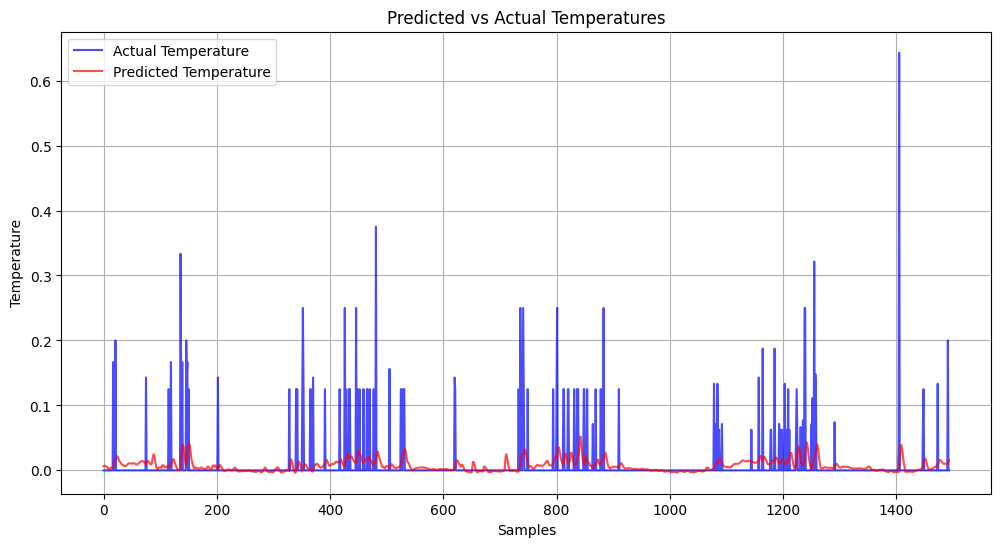

In [56]:
# Predict on the test data
predictions = best_model.predict(test_x)

# Rescale predictions back to the original range
prediction_copies = np.repeat(predictions, train_x.shape[-1], axis=-1)  # Adjust axis to match data
predicted_temp = scaler.inverse_transform(prediction_copies)[:, 6]  # Adjust index if needed

# Rescale true test values back to the original range
test_y_copies = np.repeat(test_y.reshape(-1, 1), train_x.shape[-1], axis=-1)  # Adjust axis to match data
true_temp = scaler.inverse_transform(test_y_copies)[:, 6]  # Adjust index if needed

# Print some sample predictions
print("Sample Predicted Temperatures:", predicted_temp[:10])
print("Sample True Temperatures:", true_temp[:10])

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(true_temp, predicted_temp)
mse = mean_squared_error(true_temp, predicted_temp)
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot predictions vs actual temperatures
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_temp)), true_temp, label="Actual Temperature", color="blue", alpha=0.7)
plt.plot(range(len(predicted_temp)), predicted_temp, label="Predicted Temperature", color="red", alpha=0.7)
plt.title("Predicted vs Actual Temperatures")
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()
